## TC 5033
### Word Embeddings

Emmanuel Francisco González Velázquez - A01364577

Oscar Israel Lerma Franco - A01380817

Jesús Mario Martínez Díaz - A01740049

Eduardo Selim Martínez Mayorga - A01795167

José Antonio Hernández Hernández - A01381334

<br>

#### Activity 3b: Text Classification using RNNs and AG_NEWS dataset in PyTorch
<br>

- Objective:
    - Understand the basics of Recurrent Neural Networks (RNNs) and their application in text classification.
    - Learn how to handle a real-world text dataset, AG_NEWS, in PyTorch.
    - Gain hands-on experience in defining, training, and evaluating a text classification model in PyTorch.
    
<br>

- Instructions:
    - Data Preparation: Starter code will be provided that loads the AG_NEWS dataset and prepares it for training. Do not modify this part. However, you should be sure to understand it, and comment it, the use of markdown cells is suggested.

    - Model Setup: A skeleton code for the RNN model class will be provided. Complete this class and use it to instantiate your model.

    - Implementing Accuracy Function: Write a function that takes model predictions and ground truth labels as input and returns the model's accuracy.

    - Training Function: Implement a function that performs training on the given model using the AG_NEWS dataset. Your model should achieve an accuracy of at least 80% to get full marks for this part.

    - Text Sampling: Write a function that takes a sample text as input and classifies it using your trained model.

    - Confusion Matrix: Implement a function to display the confusion matrix for your model on the test data.

    - Submission: Submit your completed Jupyter Notebook. Make sure to include a markdown cell at the beginning of the notebook that lists the names of all team members. Teams should consist of 3 to 4 members.
    
<br>

- Evaluation Criteria:

    - Correct setup of all the required libraries and modules (10%)
    - Code Quality (30%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity. Comments should be given for all the provided code, this will help you understand its functionality.
    
   - Functionality (60%):
        - All the functions should execute without errors and provide the expected outputs.
        - RNN model class (20%)
        - Accuracy fucntion (10%)
        - Training function (10%)
        - Sampling function (10%)
        - Confucion matrix (10%)

        - The model should achieve at least an 80% accuracy on the AG_NEWS test set for full marks in this criterion.


Dataset

https://pytorch.org/text/stable/datasets.html#text-classification

https://paperswithcode.com/dataset/ag-news


### Import libraries

In [4]:
!pip install torchtext torchdata
!pip install torch torchvision torchaudio
!pip install torch==2.0.1+cu118 torchtext==0.15.2 -f https://download.pytorch.org/whl/torch_stable.html

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.8 MB/s eta 0:00:006.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 36.1 MB/s eta 0:00:0031m49.4 MB/s eta 0:00:01
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 13.1 MB/s eta 0:00:0031m11.7 MB/s eta 0:00:01
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 3.5 MB/s eta 0:00:000m eta 0:00:010:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.4 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 11.0 MB/s eta 0:00:00m eta 0:00:01:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 24.1 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 26.8 MB/s eta 0:00:00m eta 0:00:010:0

In [13]:
!pip install 'portalocker>=2.0.0'

In [1]:
# The following libraries are required for running the given code
# Please feel free to add any libraries you consider adecuate to complete the assingment.
import numpy as np
#PyTorch libraries
import torch
from torchtext.datasets import AG_NEWS
# Dataloader library
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split
# Libraries to prepare the data
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torchtext.data.functional import to_map_style_dataset
# neural layers
from torch import nn
from torch.nn import functional as F

# These libraries are suggested to plot confusion matrix
# you may use others
#import scikitplot as skplt
import gc

In [3]:
# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


### Get the train and the test datasets and dataloaders

Classes:

* 1 - World

* 2 - Sports

* 3 - Business

* 4 - Sci/Tech

We will convert them to:

* 0 - World

* 1 - Sports

* 2 - Business

* 3 - Sci/Tech

In [7]:
train_dataset, test_dataset = AG_NEWS()
train_dataset, test_dataset = to_map_style_dataset(train_dataset), to_map_style_dataset(test_dataset)

In [9]:
# Get the tokeniser
# tokeniser object
tokeniser = get_tokenizer('basic_english')

def yield_tokens(data):
    for _, text in data:
        yield tokeniser(text)

In [11]:
# Build the vocabulary
vocab = build_vocab_from_iterator(yield_tokens(train_dataset), specials=["<unk>"])
#set unknown token at position 0
vocab.set_default_index(vocab["<unk>"])

In [13]:
#test tokens
tokens = tokeniser('Welcome to TE3007')
print(tokens, vocab(tokens))

['welcome', 'to', 'te3007'] [3314, 4, 0]


In [15]:
NUM_TRAIN = int(len(train_dataset)*0.9)
NUM_VAL = len(train_dataset) - NUM_TRAIN

In [17]:
train_dataset, val_dataset = random_split(train_dataset, [NUM_TRAIN, NUM_VAL])

In [19]:
print(len(train_dataset), len(val_dataset), len(test_dataset))

108000 12000 7600


In [21]:
# function passed to the DataLoader to process a batch of data as indicated
def collate_batch(batch):
    # Get label and text
    y, x = list(zip(*batch))

    # Create list with indices from tokeniser
    x = [vocab(tokeniser(text)) for text in x]
    x = [t + ([0]*(max_tokens - len(t))) if len(t) < max_tokens else t[:max_tokens] for t in x]

    # Prepare the labels, by subtracting 1 to get them in the range 0-3
    return torch.tensor(x, dtype=torch.int32), torch.tensor(y, dtype=torch.int32) - 1

In [23]:
labels =  ["World", "Sports", "Business", "Sci/Tech"]
max_tokens = 50
BATCH_SIZE = 256

In [25]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)

### Let us build our RNN model

In [28]:
EMBEDDING_SIZE = 100
NEURONS = 128
LAYERS = 2
NUM_CLASSES = 4

In [30]:
class RNN_Model_1(nn.Module):
    def __init__(self, embed_size, hidden, layers, num_classes):
        super().__init__()

        # Embedding layer
        self.embedding_layer = nn.Embedding(num_embeddings=len(vocab),
                                            embedding_dim=embed_size)

        # Recurrent layer (you could also use nn.RNN or nn.GRU here)
        self.rnn = nn.LSTM(input_size=embed_size,
                           hidden_size=hidden,
                           num_layers=layers,
                           batch_first=True)

        # Fully connected layer for classification
        self.fc = nn.Linear(hidden, num_classes)

    def forward(self, x):
        # x is (batch_size, seq_length)

        # Apply embedding layer
        x = self.embedding_layer(x)  # Shape: (batch_size, seq_length, embed_size)

        # Apply RNN layer
        out, _ = self.rnn(x)  # out shape: (batch_size, seq_length, hidden)

        # Take the output from the last time step for classification
        out = out[:, -1, :]  # Shape: (batch_size, hidden)

        # Pass through the fully connected layer
        out = self.fc(out)  # Shape: (batch_size, num_classes)

        return out

In [32]:
def accuracy(model, loader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():  # Disable gradient calculation for evaluation
        for x, y in loader:
            # Move data to the device (GPU if available)
            x, y = x.to(device), y.to(device)

            # Forward pass: Get model predictions
            outputs = model(x)

            # Get predicted class labels by finding the index of the max logit
            _, predicted = torch.max(outputs, 1)

            # Update counts
            correct += (predicted == y).sum().item()
            total += y.size(0)

    # Calculate accuracy as a percentage
    accuracy = 100 * correct / total
    return accuracy

In [64]:
def train(model, optimiser, train_loader, val_loader, criterion, epochs=100):
    for epoch in range(epochs):
        model.train()  # Set the model to training mode
        running_loss = 0.0

        for x, y in train_loader:
            # Move data to the device (GPU if available)
            x, y = x.to(device), y.to(device).long()

            # Zero the gradients
            optimiser.zero_grad()

            # Forward pass: compute predictions
            outputs = model(x)
            loss = criterion(outputs, y)

            # Backward pass: compute gradients and update weights
            loss.backward()
            optimiser.step()

            # Accumulate loss for the epoch
            running_loss += loss.item() * x.size(0)

        # Calculate average loss for the epoch
        epoch_loss = running_loss / len(train_loader.dataset)

        # Evaluate model accuracy on training and validation sets
        train_acc = accuracy(model, train_loader)
        val_acc = accuracy(model, val_loader)

        # Print epoch details
        print(f"Epoch [{epoch + 1}/{epochs}] - Loss: {epoch_loss:.4f} - Training Accuracy: {train_acc:.2f}% - Validation Accuracy: {val_acc:.2f}%")

In [40]:
# Define training parameters
epochs = 10  # You may increase if needed
lr = 0.001

# Instantiate model
rnn_model = RNN_Model_1(EMBEDDING_SIZE, NEURONS, LAYERS, NUM_CLASSES).to(device)
# Set up the optimizer
optimiser = torch.optim.Adam(rnn_model.parameters(), lr=lr)

In [66]:
train(rnn_model, optimiser, train_loader, val_loader, criterion = nn.CrossEntropyLoss(), epochs=epochs)

Epoch [1/10] - Loss: 0.8102 - Training Accuracy: 85.29% - Validation Accuracy: 84.82%
Epoch [2/10] - Loss: 0.3700 - Training Accuracy: 90.64% - Validation Accuracy: 89.11%
Epoch [3/10] - Loss: 0.2751 - Training Accuracy: 92.51% - Validation Accuracy: 89.59%
Epoch [4/10] - Loss: 0.2206 - Training Accuracy: 94.48% - Validation Accuracy: 90.78%
Epoch [5/10] - Loss: 0.1805 - Training Accuracy: 95.22% - Validation Accuracy: 90.65%
Epoch [6/10] - Loss: 0.1499 - Training Accuracy: 96.07% - Validation Accuracy: 90.60%
Epoch [7/10] - Loss: 0.1237 - Training Accuracy: 97.24% - Validation Accuracy: 90.83%
Epoch [8/10] - Loss: 0.1023 - Training Accuracy: 97.74% - Validation Accuracy: 90.37%
Epoch [9/10] - Loss: 0.0824 - Training Accuracy: 98.00% - Validation Accuracy: 90.51%
Epoch [10/10] - Loss: 0.0698 - Training Accuracy: 98.38% - Validation Accuracy: 90.19%


In [68]:
print(f'{accuracy(rnn_model, test_loader):.4f}')

89.4474


In [70]:
def sample_text(model, text):
    model.eval()  # Set the model to evaluation mode

    # Tokenize and encode the input text
    tokens = tokeniser(text)
    token_ids = vocab(tokens)

    # Pad or truncate to the maximum length
    token_ids = token_ids[:max_tokens] + [0] * (max_tokens - len(token_ids))

    # Convert to tensor and move to the device
    input_tensor = torch.tensor([token_ids], dtype=torch.int32).to(device)

    with torch.no_grad():  # Disable gradients for evaluation
        # Get the model prediction
        output = model(input_tensor)
        _, predicted_class = torch.max(output, 1)

    # Map the predicted index to the corresponding label
    predicted_label = labels[predicted_class.item()]
    return predicted_label

In [96]:
train_iter = iter(AG_NEWS(split='train'))
label, sampleTxt = next(train_iter)
print("Sample text:\n", sampleTxt, "\nPredicted Label:" , sample_text(rnn_model, sampleTxt))

Sample text:
 Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again. 
Predicted Label: Sci/Tech


In [74]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(model, loader, labels):
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for x, y in loader:
            # Move data to device
            x, y = x.to(device), y.to(device)

            # Get model predictions
            outputs = model(x)
            _, predicted = torch.max(outputs, 1)

            # Store predictions and actual labels
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(y.cpu().numpy())

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Plot confusion matrix using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

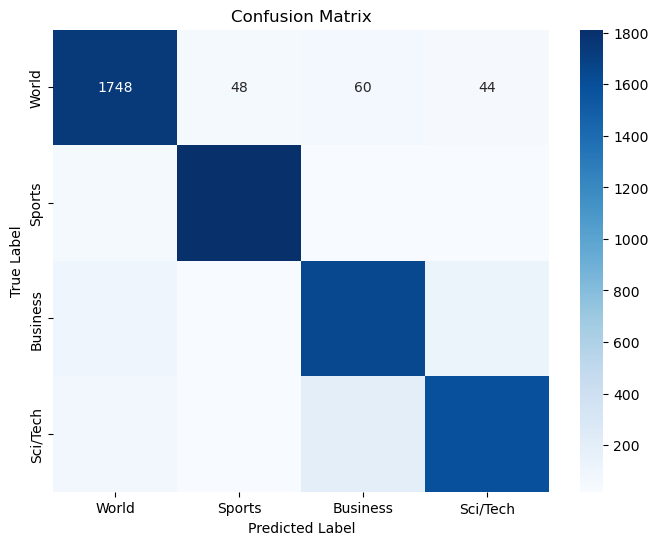

In [98]:
plot_confusion_matrix(rnn_model, test_loader, labels=["World", "Sports", "Business", "Sci/Tech"])